In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from src.auxiliares import dataframe_coeficientes
from src.config import DADOS_TRATADOS
from src.graficos import plot_coeficientes, plot_residuos

sns.set_theme(palette="bright")

RANDOM_STATE = 42

In [3]:
df = pd.read_parquet(DADOS_TRATADOS)

df.head()

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose,target
0,59,2,32.099998,101.0,157,93.199997,38.0,4.0,4.8598,87,151
1,48,1,21.600000,87.0,183,103.199997,70.0,3.0,3.8918,69,75
2,72,2,30.500000,93.0,156,93.599998,41.0,4.0,4.6728,85,141
3,24,1,25.299999,84.0,198,131.399994,40.0,5.0,4.8903,89,206
4,50,1,23.000000,101.0,192,125.400002,52.0,4.0,4.2905,80,135


In [5]:
df["sexo"] = df["sexo"].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   idade             442 non-null    int8    
 1   sexo              442 non-null    category
 2   imc               442 non-null    float32 
 3   pressao_media     442 non-null    float32 
 4   colesterol_total  442 non-null    int16   
 5   ldl               442 non-null    float32 
 6   hdl               442 non-null    float32 
 7   colesterol_hdl    442 non-null    float32 
 8   triglicerides     442 non-null    float32 
 9   glicose           442 non-null    int8    
 10  target            442 non-null    int16   
dtypes: category(1), float32(6), int16(2), int8(2)
memory usage: 13.6 KB


A técnica de One-Hot Encoding é amplamente utilizada em machine learning e processamento de dados para converter variáveis categóricas em uma forma que possa ser utilizada por algoritmos de aprendizado de máquina, que geralmente requerem dados numéricos.

### O Problema das Variáveis Categóricas

Muitas vezes, conjuntos de dados contêm variáveis categóricas, ou seja, variáveis que representam categorias distintas, como "cor", "tipo de produto", "gênero", entre outros. Essas categorias não possuem uma ordem intrínseca e, portanto, não podem ser diretamente tratadas como valores numéricos. No entanto, a maioria dos algoritmos de machine learning trabalha com números, e alimentar categorias diretamente como números pode induzir o algoritmo a inferir uma ordem ou relação numérica que não existe.

### O Conceito de One-Hot Encoding

One-Hot Encoding resolve esse problema ao transformar cada categoria em uma nova variável binária (coluna), onde cada coluna representa uma categoria única da variável original. Se a instância da variável pertence a essa categoria, a coluna correspondente recebe o valor 1, caso contrário, recebe o valor 0.

### Exemplo

Considere uma variável categórica simples que indica a cor de um objeto com três possíveis valores: "Vermelho", "Verde" e "Azul". Usando One-Hot Encoding, essa variável categórica seria transformada em três colunas, uma para cada cor:



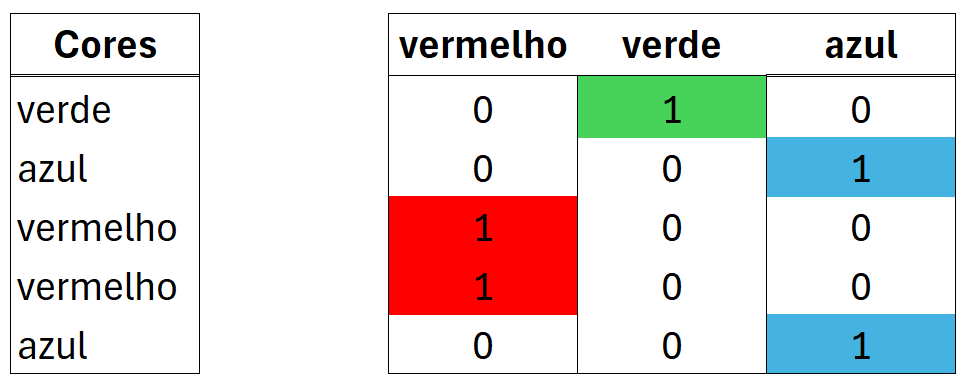


Nesse formato, cada categoria da variável original é representada de maneira independente, evitando que o modelo interprete erroneamente a ordem ou a proximidade entre as categorias.

### Vantagens do One-Hot Encoding

- **Neutralidade de Ordens**: Não impõe nenhuma ordem entre as categorias, evitando interpretações errôneas por parte dos modelos.
- **Compatibilidade**: A maioria dos algoritmos de machine learning pode processar esses dados, uma vez que se tornam numéricos.

### Desvantagens do One-Hot Encoding

- **Alta Dimensionalidade**: Se uma variável categórica tiver muitas categorias, One-Hot Encoding pode gerar um grande número de novas colunas, aumentando a dimensionalidade do conjunto de dados e potencialmente levando a problemas de desempenho e complexidade.
- **Espaço de Memória**: Em casos de conjuntos de dados muito grandes ou com muitas categorias, o armazenamento das matrizes resultantes pode consumir muita memória.

### Aplicações e Considerações

One-Hot Encoding é especialmente útil em modelos de classificação e regressão, onde a neutralidade da representação categórica é crítica. No entanto, quando se lida com variáveis categóricas de alta cardinalidade (muitas categorias), técnicas alternativas podem ser mais adequadas para evitar a explosão combinatorial de colunas.


https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [14]:
X = df.drop(columns="target")
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [17]:
pipeline = Pipeline([
    ("preprocessor", ColumnTransformer([
        ("numeric", StandardScaler(), X.select_dtypes(include="number").columns),
        ("categoric", OneHotEncoder(drop="if_binary"), ["sexo"])
    ])),
    ("reg", LinearRegression())
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  Index(['idade', 'imc', 'pressao_media', 'colesterol_total', 'ldl', 'hdl',
       'colesterol_hdl', 'triglicerides', 'glicose'],
      dtype='object')),
                                                 ('categoric',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['sexo'])])),
                ('reg', LinearRegression())])

In [19]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  Index(['idade', 'imc', 'pressao_media', 'colesterol_total', 'ldl', 'hdl',
       'colesterol_hdl', 'triglicerides', 'glicose'],
      dtype='object')),
                                                 ('categoric',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['sexo'])])),
                ('reg', LinearRegression())])

In [25]:
pipeline.named_steps

{'preprocessor': ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                  Index(['idade', 'imc', 'pressao_media', 'colesterol_total', 'ldl', 'hdl',
        'colesterol_hdl', 'triglicerides', 'glicose'],
       dtype='object')),
                                 ('categoric', OneHotEncoder(drop='if_binary'),
                                  ['sexo'])]),
 'reg': LinearRegression()}

In [29]:
pipeline["reg"].coef_

array([  1.75375723,  25.60712087,  16.82887089, -44.44885934,
        24.64095583,   7.67697872,  13.13878389,  35.16119782,
         2.35136418, -23.06446729])

In [31]:
pipeline["reg"].intercept_

np.float64(164.58272275712633)

In [33]:
pipeline["preprocessor"]

ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                 Index(['idade', 'imc', 'pressao_media', 'colesterol_total', 'ldl', 'hdl',
       'colesterol_hdl', 'triglicerides', 'glicose'],
      dtype='object')),
                                ('categoric', OneHotEncoder(drop='if_binary'),
                                 ['sexo'])])

In [35]:
pipeline["preprocessor"].feature_names_in_

array(['idade', 'sexo', 'imc', 'pressao_media', 'colesterol_total', 'ldl',
       'hdl', 'colesterol_hdl', 'triglicerides', 'glicose'], dtype=object)

In [37]:
pipeline["preprocessor"].get_feature_names_out()

array(['numeric__idade', 'numeric__imc', 'numeric__pressao_media',
       'numeric__colesterol_total', 'numeric__ldl', 'numeric__hdl',
       'numeric__colesterol_hdl', 'numeric__triglicerides',
       'numeric__glicose', 'categoric__sexo_2'], dtype=object)

In [39]:
coefs = dataframe_coeficientes(
    pipeline["reg"].coef_,
    pipeline["preprocessor"].get_feature_names_out()
)

coefs

,coeficiente
numeric__colesterol_total,-44.448859
categoric__sexo_2,-23.064467
numeric__idade,1.753757
numeric__glicose,2.351364
numeric__hdl,7.676979
numeric__colesterol_hdl,13.138784
numeric__pressao_media,16.828871
numeric__ldl,24.640956
numeric__imc,25.607121
numeric__triglicerides,35.161198


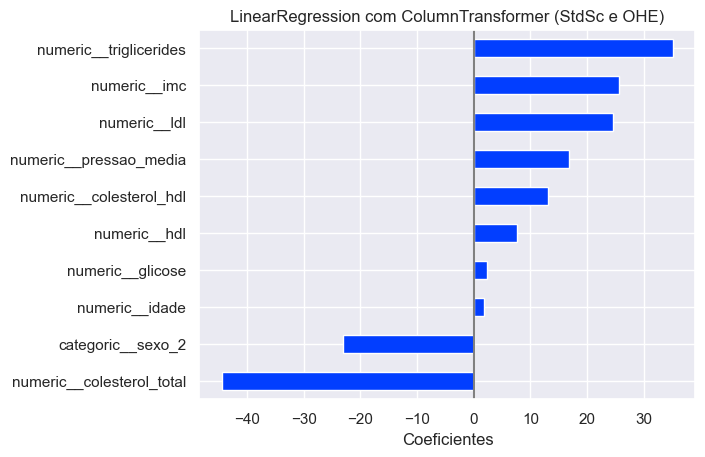

In [43]:
plot_coeficientes(coefs, "LinearRegression com ColumnTransformer (StdSc e OHE)")

In [45]:
pipeline["preprocessor"]["categoric"]

OneHotEncoder(drop='if_binary')

In [51]:
X["sexo"]

0      2
1      1
2      2
3      1
4      1
      ..
437    2
438    2
439    2
440    1
441    1
Name: sexo, Length: 442, dtype: category
Categories (2, int8): [1, 2]

In [53]:
pipeline["preprocessor"]["categoric"].transform(X[["sexo"]]).toarray()[:5]

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [56]:
y_pred = pipeline.predict(X_test)

In [58]:
mean_absolute_error(y_test, y_pred)

np.float64(42.79409657680721)

In [60]:
mean_squared_error(y_test, y_pred)

np.float64(2900.1938516184405)

In [62]:
root_mean_squared_error(y_test, y_pred)

np.float64(53.85344790835997)

In [64]:
r2_score(y_test, y_pred)

0.4526027208581844

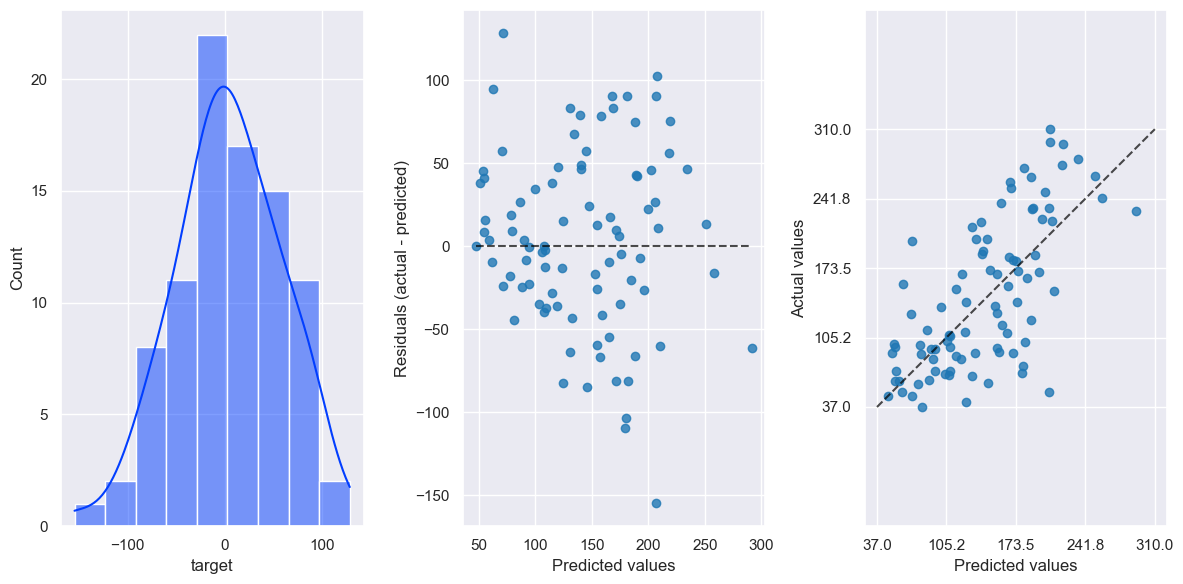

In [67]:
plot_residuos(y_test, y_pred)